# Goeduhub | Task - 15 (spam filter using Multinomial NB)  
  
# Reg - ID : GO_STP_2134
---

## Build a spam filter using Python and the multinomial Naive Bayes algorithm. 


## Check Spam or Ham? Email Classifier Using Python using MultinomialNB.  

## Dataset:  
https://drive.google.com/file/d/1wr_soCWCZEOOzM9mJxYoTm9kySmAZAM4/view

---
## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'E:\Goeduhub_ML_Program_May_20\data\spam.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
df.shape

(5572, 2)

In [8]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [9]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [14]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

## Data Visualization

In [15]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Category', ylabel='count'>

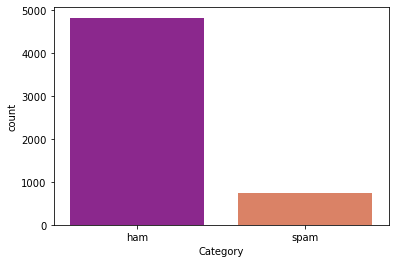

In [17]:
sns.countplot('Category',data=df,palette='plasma')

## Machine Learning Model  
  ---
## Data preprocessing

In [19]:
from sklearn.preprocessing import LabelEncoder as LE
le=LE()
df['Category']=le.fit_transform(df['Category'])

In [20]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Data Splitting for train and test

In [23]:
x=df.Message
y=df['Category']

In [24]:
x.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [25]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.2,random_state=42)

In [26]:
print(xtrain.shape)
print(xtest.shape)
print(ytest.shape)
print(ytrain.shape)

(4457,)
(1115,)
(1115,)
(4457,)


## CountVectorizer

In [27]:
from sklearn.feature_extraction.text import CountVectorizer as CV
cv=CV()
xtrain_vector=cv.fit_transform(xtrain)

In [28]:
xtrain_vector

<4457x7701 sparse matrix of type '<class 'numpy.int64'>'
	with 59275 stored elements in Compressed Sparse Row format>

In [29]:
print(xtrain_vector.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


---
## Tfidf Vectorizer

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
tfidf=TfidfVectorizer()
xtrain_tfidf=tfidf.fit_transform(xtrain)

In [33]:
xtrain_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

---
## Multinomial Naive Bayes model


In [34]:
from sklearn.naive_bayes import MultinomialNB as MNB
mnb=MNB()
model=mnb.fit(xtrain_vector,ytrain)

In [35]:
model1=mnb.fit(xtrain_tfidf,ytrain)

In [36]:
xtest_vector=cv.transform(xtest)

In [37]:
xtest_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
xtest_tfidf=tfidf.transform(xtest)
xtest_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
ypred=model.predict(xtest_vector)
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
ypred1=model1.predict(xtest_tfidf)
ypred1

array([0, 0, 0, ..., 0, 0, 0])

## Accuracy

In [43]:
print('Trianing accuracy using cv',model.score(xtrain_vector,ytrain))
print('Training Accuracy usig Tfidf',model.score(xtrain_tfidf,ytrain))

Trianing accuracy using cv 0.977563383441777
Training Accuracy usig Tfidf 0.9726273277989679


In [44]:
print('Testing accuracy using cv',model.score(xtest_vector,ytest))
print('Testing accuracy using tfidf',model.score(xtest_tfidf,ytest))

Testing accuracy using cv 0.9695067264573991
Testing accuracy using tfidf 0.9650224215246637


In [46]:
from sklearn import metrics
print("accuracy usig CV",metrics.accuracy_score(ytest,ypred))
print("accuracy usig Tfidf",metrics.accuracy_score(ytest,ypred1))


accuracy usig CV 0.9695067264573991
accuracy usig Tfidf 0.9650224215246637


---
## Confusion Matrix



In [49]:
cm=metrics.confusion_matrix(ytest,ypred)
cm

array([[966,   0],
       [ 34, 115]], dtype=int64)

<AxesSubplot:>

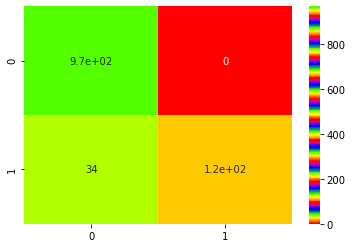

In [48]:
sns.heatmap(cm,annot=True,cmap='prism')

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

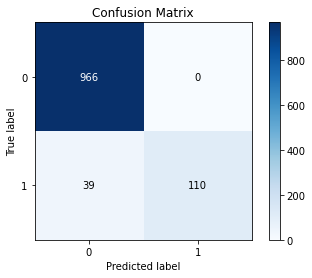

In [55]:
#for Tfidf
import scikitplot
scikitplot.metrics.plot_confusion_matrix(ytest,ypred1)

---
## Classification Report

In [57]:
#for cv
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [58]:
#for tfidf
print(metrics.classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.74      0.85       149

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.97      0.96      1115



---
## ROC curve

In [60]:
pred_prob=model.predict_proba(xtest_vector)
pred_prob_tfidf=model1.predict_proba(xtest_tfidf)

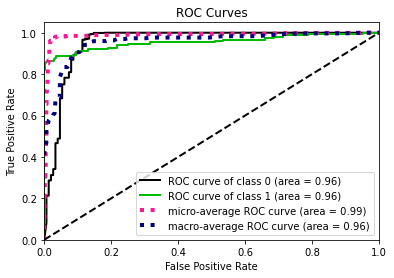

In [62]:
#for countvectorizer
scikitplot.metrics.plot_roc(ytest,pred_prob)
plt.show()

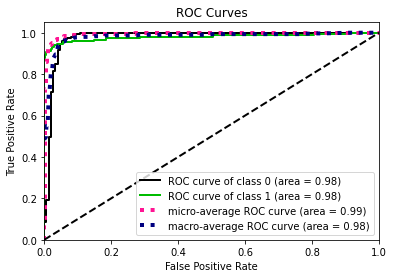

In [63]:
#for tfidf
scikitplot.metrics.plot_roc(ytest,pred_prob_tfidf)
plt.show()